In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import chi2
import random as rn
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad

##Para el $^{60}\mathrm{Co}$

In [ ]:
file=open("Co60_10minNaI.csv")
arr = np.loadtxt("Co60_10minNaI.csv",
                 delimiter=",", dtype=str)
new=np.delete(arr,np.where(arr== arr[0]))

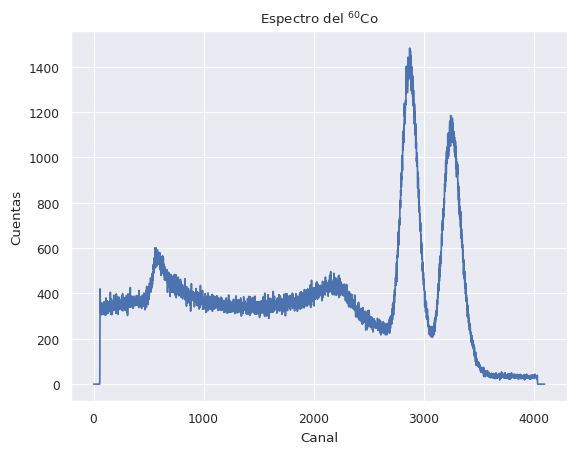

In [ ]:
new=np.array(new,dtype=int)
canal=new[0:len(new):2]
cuentas=new[1:len(new):2]

sns.set()
sns.set_context("paper")
plt.plot(canal,cuentas)
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Espectro del $^{60}\mathrm{Co}$')
plt.show()

**Primer fotopico $^{60}\mathrm{Co}$ fotopico 1173keV**

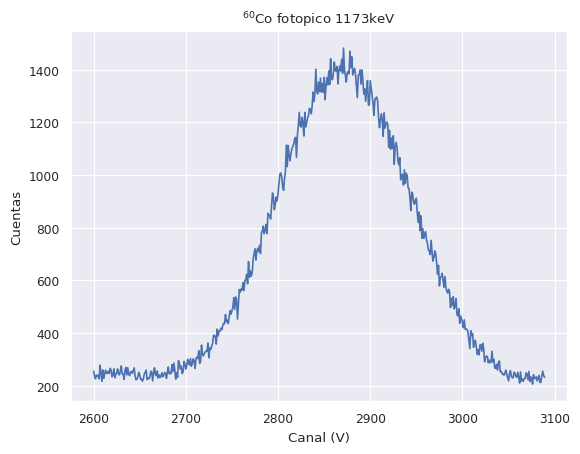

In [ ]:
g1=np.where(canal==2600)[0][0]
g2=np.where(canal==3090)[0][0]
cuentas_p1= cuentas[g1:g2]
canal_p1=  canal[g1:g2]
plt.plot(canal_p1,cuentas_p1)
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('$^{60}\mathrm{Co}$ fotopico 1173keV')
plt.show()

In [ ]:
M0=max(cuentas_p1)
posicion_mu=np.where(cuentas_p1==M0)[0]
mu0=canal_p1[posicion_mu]

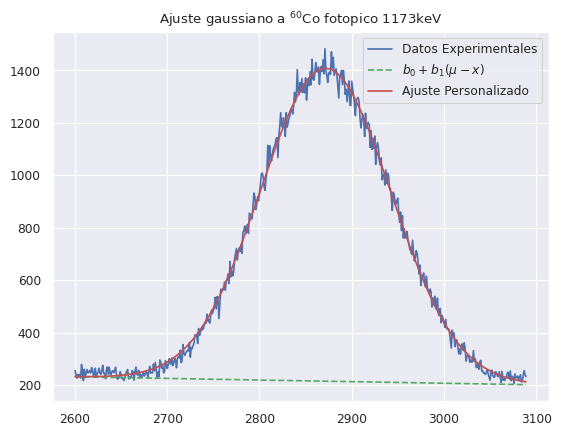


Resultados del ajuste gaussiano para el primer fotopico:

Valor de b0 : 214.48(2.61)
Valor de b1 : 0.06(0.01)
Valor de μ : 2871.83(0.23)
Amplitud M : 1192.41(3.41)
Desviación Estándar σ : 70.79(0.29)
Intensidad (cuentas) : 317265
FWHM: 166.7


In [ ]:
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu0[0], M0, 150.0]
limite_inf = 2600
limite_sup = 3090

parametros_optimos, pcov = curve_fit(curva, canal_p1, cuentas_p1, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{60}\mathrm{Co}$ fotopico 1173keV')
plt.plot(canal_p1, cuentas_p1, label="Datos Experimentales")
plt.plot(canal_p1, b0 + b1 * (mu - canal_p1), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p1, curva(canal_p1, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para el primer fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

**Segundo fotopico del $^{60}\mathrm{Co}$ 1332keV**

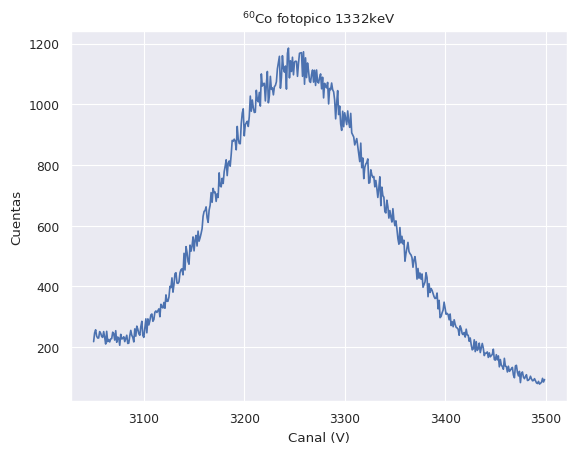

In [ ]:
g3=np.where(canal==3050)[0][0]
g4=np.where(canal==3500)[0][0]
cuentas_p2= cuentas[g3:g4]
canal_p2=  canal[g3:g4]
plt.plot(canal_p2,cuentas_p2)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('$^{60}\mathrm{Co}$ fotopico 1332keV')
plt.show()

In [ ]:
M02=max(cuentas_p2)
posicion_mu2=np.where(cuentas_p2==M02)[0]
mu02=canal_p2[posicion_mu2]

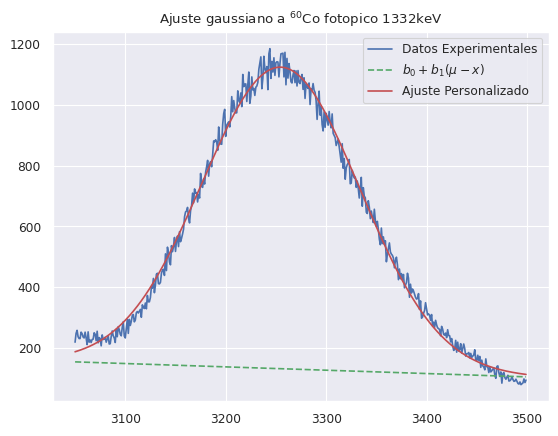


Resultados del ajuste gaussiano para el segundo fotopico:

Valor de b0 : 130.61(4.11)
Valor de b1 : 0.11(0.01)
Valor de μ : 3254.88(0.36)
Amplitud M : 993.49(4.34)
Desviación Estándar σ : 78.61(0.5)
Intensidad (cuentas) : 252468
FWHM: 185.11


In [ ]:
# Define la función que deseas ajustar
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu02[0], M02, 150.0]
limite_inf = 3050
limite_sup = 3500

parametros_optimos, pcov = curve_fit(curva, canal_p2, cuentas_p2, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{60}\mathrm{Co}$ fotopico 1332keV')
plt.plot(canal_p2, cuentas_p2, label="Datos Experimentales")
plt.plot(canal_p2, b0 + b1 * (mu - canal_p2), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p2, curva(canal_p2, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para el segundo fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

**Ajuste de fotopicos simultáneos**

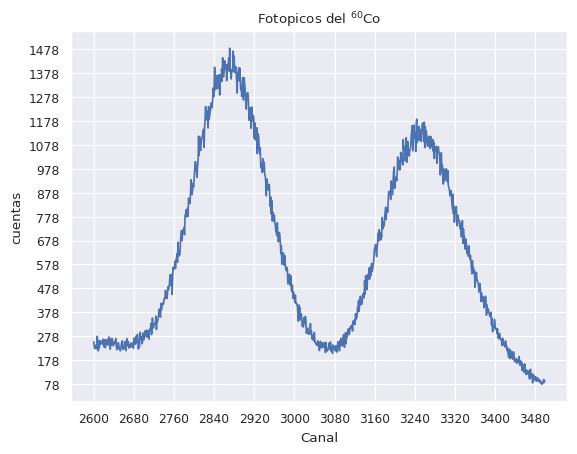

In [ ]:
gi=np.where(canal==2600)[0][0]
gi1=np.where(canal==3500)[0][0]
cuentas_p4= cuentas[gi:gi1]
canal_p4= canal[gi:gi1]
plt.plot(canal_p4,cuentas_p4)
plt.xlabel('Canal')
plt.ylabel('cuentas')
plt.title('Fotopicos del $^{60}\mathrm{Co}$')

plt.xticks(np.arange(min(canal_p4), max(canal_p4), 80))
plt.yticks(np.arange(min(cuentas_p4), max(cuentas_p4), 100))

plt.show()

Parámetros ajustados:

b0:188.88(2.4)
b1:0.14(0.01)
mu:3254.88(0.22)
M:993.49(3.54)
sigma:78.61(0.28)


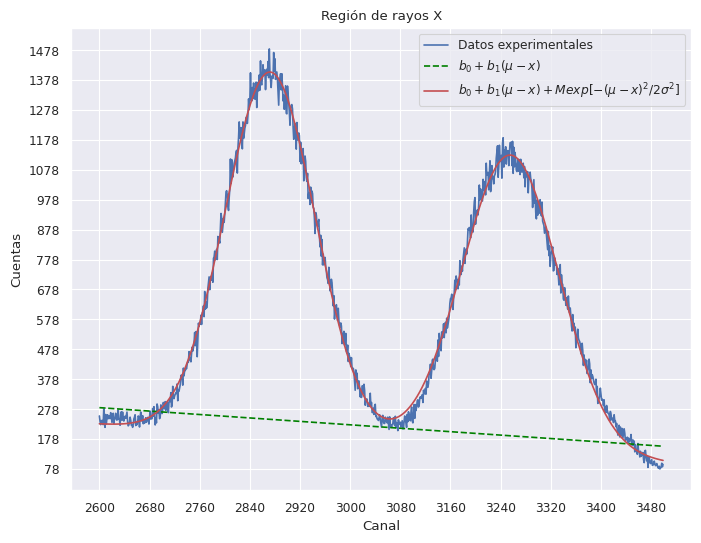

In [ ]:
def custom_curve4(x, b0, b1, mu1, M1, sigma1, mu2, M2, sigma2):
    return b0 + b1 * (mu1 - x) + M1 * np.exp(-((mu1 - x)**2) / (2 * sigma1**2)) + M2 * np.exp(-((mu2 - x)**2) / (2 * sigma2**2))

xdata = canal_p4
ydata = cuentas_p4

parametros_iniciales = [1.0, 1.0, 2871.83, 1192.41, 70.79,3253.05, 962.94, 75.31]
popt4, pcov4 = curve_fit(custom_curve4, xdata, ydata, p0=parametros_iniciales)
b0, b1, mu1, M1, sigma1,mu2, M2, sigma2 = popt4

incertidumbres=np.sqrt(np.diag(pcov4))
print("Parámetros ajustados:")
print('')
print(f"b0:{round(b0,2)}({round(incertidumbres[0],2)})")
print(f"b1:{round(b1,2)}({round(incertidumbres[1],2)})")
print(f"mu:{round(mu,2)}({round(incertidumbres[2],2)})")
print(f"M:{round(M,2)}({round(incertidumbres[3],2)})")
print(f"sigma:{round(sigma,2)}({round(incertidumbres[4],2)})")



plt.figure(figsize=(8, 6))
plt.plot(xdata, ydata, label='Datos experimentales')
plt.plot(xdata, b0 + b1 * (mu - xdata), '--', color='green', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(xdata, custom_curve4(xdata, b0, b1, mu1, M1, sigma1,mu2, M2, sigma2), 'r', label=r'$b_0 + b_1(\mu - x) + M exp[-(\mu - x)^2/2\sigma^2]$')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Región de rayos X')

plt.xticks(np.arange(min(canal_p4), max(canal_p4), 80))
plt.yticks(np.arange(min(cuentas_p4), max(cuentas_p4), 100))
plt.legend()
plt.show()

##Para el $^{137}\mathrm{Cs}$

In [ ]:
file=open("Cs137_5minNaI.csv")
arr = np.loadtxt("Cs137_5minNaI.csv",
                 delimiter=",", dtype=str)
new=np.delete(arr,np.where(arr== arr[0]))

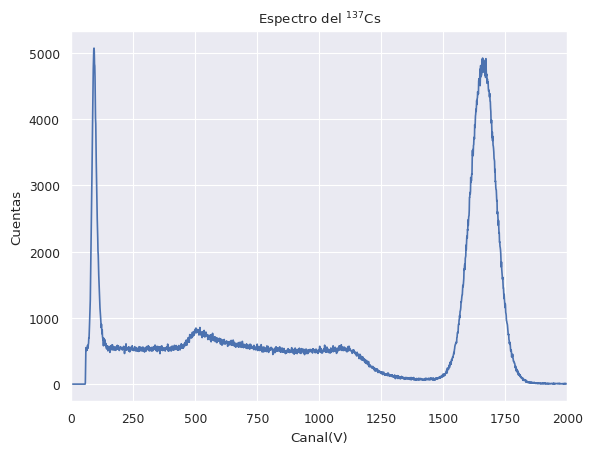

In [ ]:
new=np.array(new,dtype=int)
canal=new[0:len(new):2]
cuentas=new[1:len(new):2]

sns.set()
sns.set_context("paper")
plt.plot(canal,cuentas)
plt.xlabel('Canal(V)')
plt.ylabel('Cuentas')
plt.title('Espectro del $^{137}\mathrm{Cs}$')
plt.xlim(0, 2000)
plt.show()

**Fotopico a 662 keV**

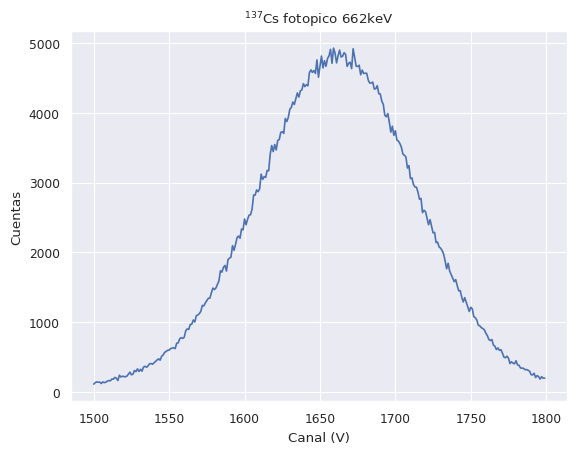

In [ ]:
g1=np.where(canal==1500)[0][0]
g2=np.where(canal==1800)[0][0]
cuentas_p1= cuentas[g1:g2]
canal_p1=  canal[g1:g2]
plt.plot(canal_p1,cuentas_p1)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('$^{137}\mathrm{Cs}$ fotopico 662keV')
plt.show()

In [ ]:
M0=max(cuentas_p1)
posicion_mu=np.where(cuentas_p1==M0)[0]
mu0=canal_p1[posicion_mu]

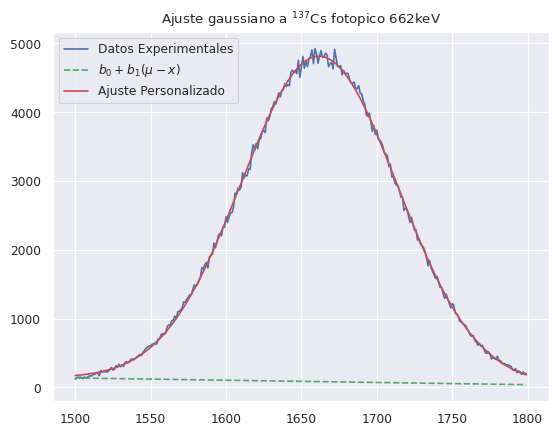


Resultados del ajuste gaussiano para del fotopico:

Valor de b0 : 82.71(8.51)
Valor de b1 : 0.33(0.05)
Valor de μ : 1661.85(0.11)
Amplitud M : 4730.81(9.07)
Desviación Estándar σ : -51.84(0.14)
Intensidad (cuentas) : 637738
FWHM: -122.06


In [ ]:
# Define la función que deseas ajustar
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu0[0], M0, 150.0]
limite_inf = 1500
limite_sup = 1800

parametros_optimos, pcov = curve_fit(curva, canal_p1, cuentas_p1, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{137}\mathrm{Cs}$ fotopico 662keV')
plt.plot(canal_p1, cuentas_p1, label="Datos Experimentales")
plt.plot(canal_p1, b0 + b1 * (mu - canal_p1), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p1, curva(canal_p1, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para del fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

**Rayo X a 32 keV**

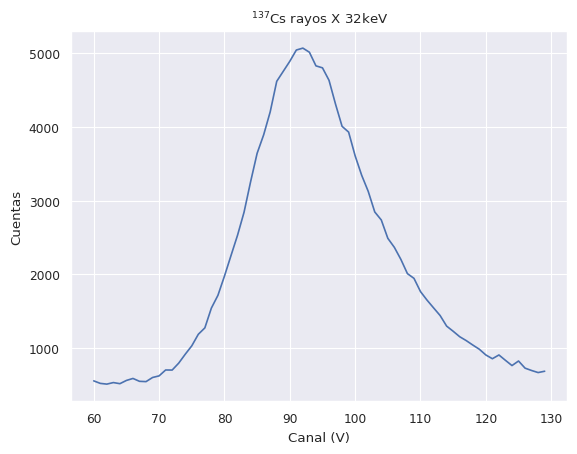

In [ ]:
g3=np.where(canal==60)[0][0]
g4=np.where(canal==130)[0][0]
cuentas_p2= cuentas[g3:g4]
canal_p2=  canal[g3:g4]
plt.plot(canal_p2,cuentas_p2)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('$^{137}\mathrm{Cs}$ rayos X 32keV')
plt.show()

In [ ]:
M02=max(cuentas_p2)
posicion_mu2=np.where(cuentas_p2==M02)[0]
mu02=canal_p2[posicion_mu2]

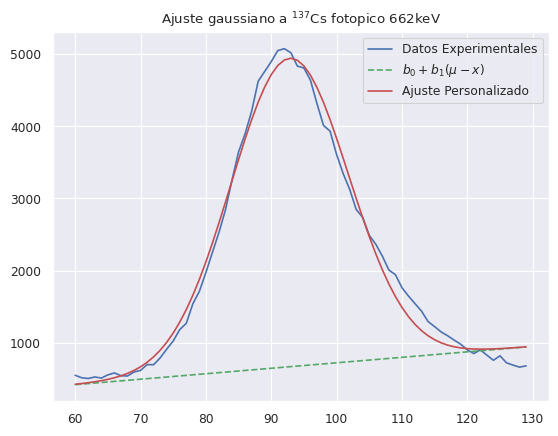


Resultados del ajuste gaussiano para del fotopico:

Valor de b0 : 670.85(35.25)
Valor de b1 : -7.57(1.08)
Valor de μ : 92.82(0.14)
Amplitud M : 4269.31(56.09)
Desviación Estándar σ : 9.0(0.16)
Intensidad (cuentas) : 144431
FWHM: 21.2


In [ ]:
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu02[0], M02, 10.0]
limite_inf = 60
limite_sup = 130

parametros_optimos, pcov = curve_fit(curva, canal_p2, cuentas_p2, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{137}\mathrm{Cs}$ fotopico 662keV')
plt.plot(canal_p2, cuentas_p2, label="Datos Experimentales")
plt.plot(canal_p2, b0 + b1 * (mu - canal_p2), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p2, curva(canal_p2, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para del fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

**Región Compton**

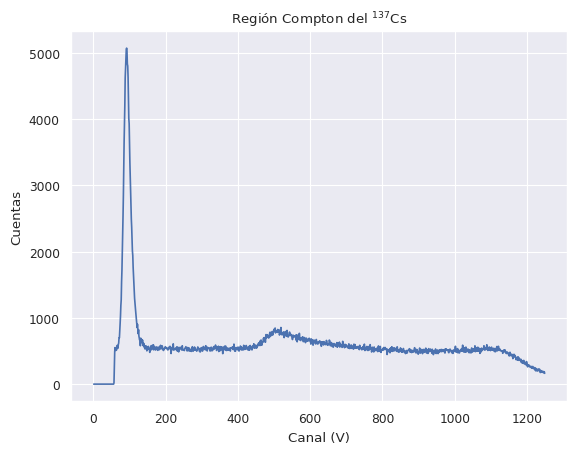

In [ ]:
g1=np.where(canal==1)[0][0]
g2=np.where(canal==1250)[0][0]
cuentas_p1= cuentas[g1:g2]
canal_p1=  canal[g1:g2]
plt.plot(canal_p1,cuentas_p1)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('Región Compton del $^{137}\mathrm{Cs}$')
plt.show()

##Para el $^{22}\mathrm{Na}$

In [ ]:
file=open("Na22_10minNaI.csv")
arr = np.loadtxt("Na22_10minNaI.csv",
                 delimiter=",", dtype=str)
new=np.delete(arr,np.where(arr== arr[0]))

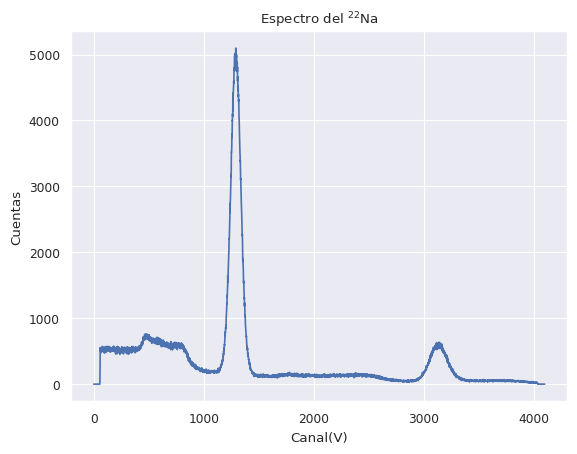

In [ ]:
new=np.array(new,dtype=int)
canal=new[0:len(new):2]
cuentas=new[1:len(new):2]

sns.set()
sns.set_context("paper")
plt.plot(canal,cuentas)
plt.xlabel('Canal(V)')
plt.ylabel('Cuentas')
plt.title('Espectro del $^{22}\mathrm{Na}$')
plt.show()

**Primer fotopico a 511 keV**

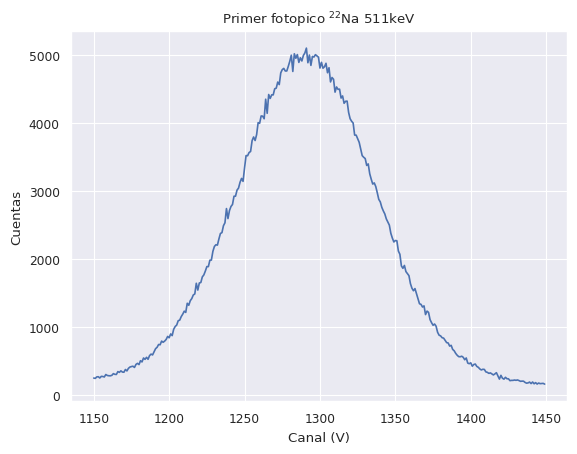

In [ ]:
g1=np.where(canal==1150)[0][0]
g2=np.where(canal==1450)[0][0]
cuentas_p1= cuentas[g1:g2]
canal_p1=  canal[g1:g2]
plt.plot(canal_p1,cuentas_p1)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('Primer fotopico $^{22}\mathrm{Na}$ 511keV')
plt.show()

In [ ]:
M0=max(cuentas_p1)
posicion_mu=np.where(cuentas_p1==M0)[0]
mu0=canal_p1[posicion_mu]

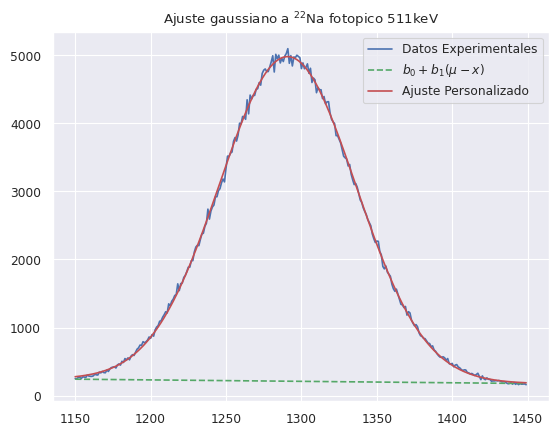


Resultados del ajuste gaussiano para del fotopico:

Valor de b0 : 210.91(5.82)
Valor de b1 : 0.21(0.04)
Valor de μ : 1290.92(0.08)
Amplitud M : 4770.31(7.52)
Desviación Estándar σ : 45.13(0.1)
Intensidad (cuentas) : 601732
FWHM: 106.27


In [ ]:
# Define la función que deseas ajustar
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu0[0], M0, 100.0]
limite_inf = 1150
limite_sup = 1450

parametros_optimos, pcov = curve_fit(curva, canal_p1, cuentas_p1, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{22}\mathrm{Na}$ fotopico 511keV')
plt.plot(canal_p1, cuentas_p1, label="Datos Experimentales")
plt.plot(canal_p1, b0 + b1 * (mu - canal_p1), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p1, curva(canal_p1, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para del fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

**Segundo fotopico a 1275 keV**

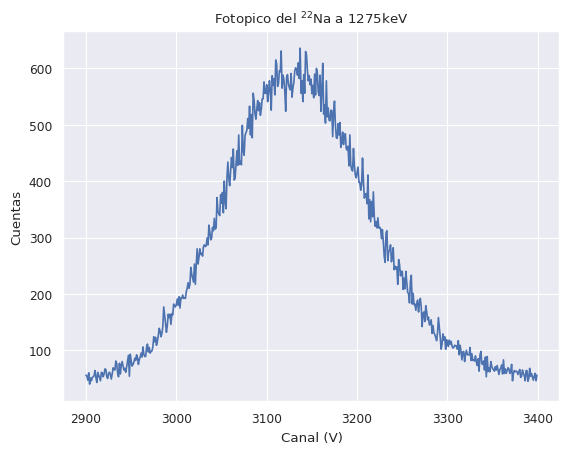

In [ ]:
g3=np.where(canal==2900)[0][0]
g4=np.where(canal==3400)[0][0]
cuentas_p2= cuentas[g3:g4]
canal_p2=  canal[g3:g4]
plt.plot(canal_p2,cuentas_p2)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('Fotopico del $^{22}\mathrm{Na}$ a 1275keV')
plt.show()

In [ ]:
M02=max(cuentas_p2)
posicion_mu2=np.where(cuentas_p2==M02)[0]
mu02=canal_p2[posicion_mu2]

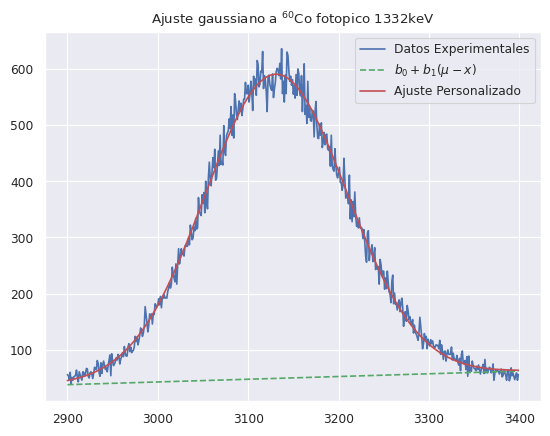


Resultados del ajuste gaussiano para el segundo fotopico:

Valor de b0 : 49.21(1.77)
Valor de b1 : -0.05(0.01)
Valor de μ : 3130.43(0.35)
Amplitud M : 541.34(2.13)
Desviación Estándar σ : 78.55(0.45)
Intensidad (cuentas) : 131460
FWHM: 184.97


In [ ]:
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu02[0], M02, 150.0]
limite_inf = 2900
limite_sup = 3400

parametros_optimos, pcov = curve_fit(curva, canal_p2, cuentas_p2, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{60}\mathrm{Co}$ fotopico 1332keV')
plt.plot(canal_p2, cuentas_p2, label="Datos Experimentales")
plt.plot(canal_p2, b0 + b1 * (mu - canal_p2), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p2, curva(canal_p2, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para el segundo fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

**Esquema de decaimiento del 22Na**

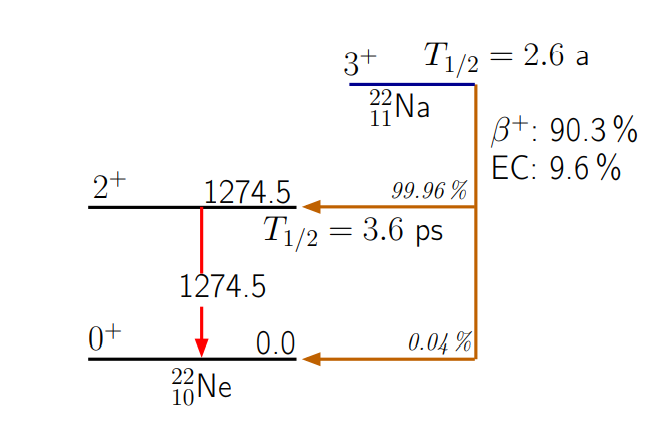

Se producen 2 fotones de 511 keV debido a que por decaimento $\beta^{-}$ se produce un $e^{-}$, mientras que por captura electrónica se genera un $e^{+}$ y debido al choque entre ambas partículas, es decir, la aniquilición de pares se emiten dos rayos $\gamma$ de 511 keV.

**Razón de intensidad**

Debido a que $\Omega$ es $4π$, la eficiencia geométrica es de 1, pues $ɛ_{geo}=\frac{4\pi}{4\pi}=1$, además que $ɛ_{abs}=1$ y $ɛ_{int}=1$.\

Sabiendo que por cada rayo $\gamma$ de 1274 keV hay una emisión de 2 rayos $\gamma$ de 511 keV entonces la razón teórica de intensidad sería dada por

$\frac{I_{\gamma}\, (511 keV)}{I_{\gamma}\, (1274 keV)}=\frac{1/2\, I_{\gamma}\, (1274 keV)}{\, I_{\gamma}(1274 keV)}=0.5$

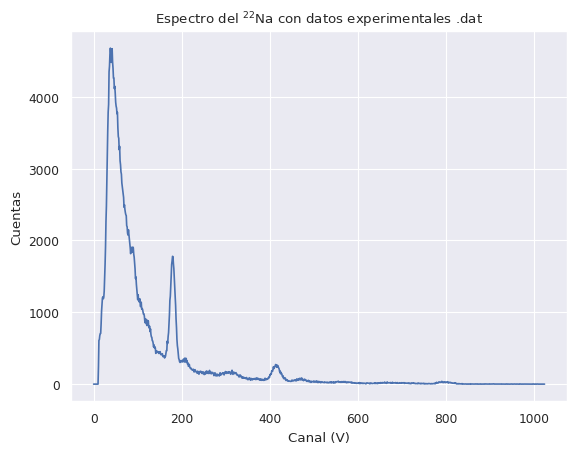

In [ ]:
data = np.loadtxt("NaI_22Na_600s.dat", skiprows=1)
canal = data[:, 0]
cuentas = data[:, 1]
sns.set()
sns.set_context("paper")

plt.plot(canal, cuentas)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('Espectro del $^{22}\mathrm{Na}$ con datos experimentales .dat')
plt.show()

hacer lo mismo que hemos hecho para los dos picos y dividir la intensidad del pico a 511 y el otro de 1274 kev para hallar la razon teórica

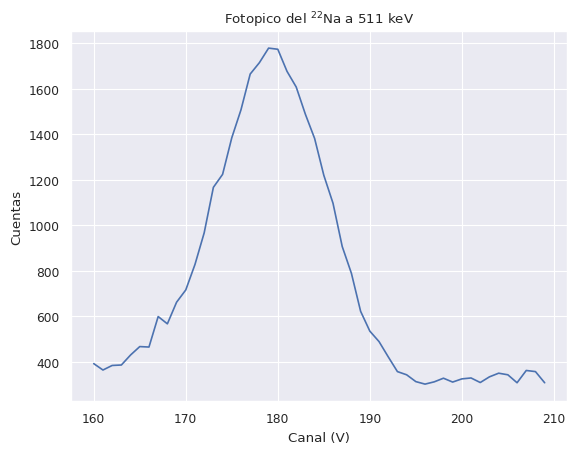

In [ ]:
g1=np.where(canal==160)[0][0]
g2=np.where(canal==210)[0][0]
cuentas_p1= cuentas[g1:g2]
canal_p1=  canal[g1:g2]
plt.plot(canal_p1,cuentas_p1)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('Fotopico del $^{22}\mathrm{Na}$ a 511 keV')
plt.show()

In [ ]:
M0=max(cuentas_p1)
posicion_mu=np.where(cuentas_p1==M0)[0]
mu0=canal_p1[posicion_mu]

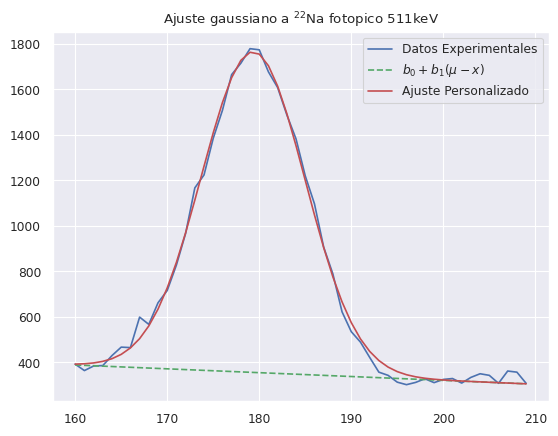


Resultados del ajuste gaussiano para del fotopico:

Valor de b0 : 355.84(8.51)
Valor de b1 : 1.69(0.37)
Valor de μ : 179.36(0.06)
Amplitud M : 1409.61(13.75)
Desviación Estándar σ : 5.64(0.07)
Intensidad (cuentas) : 37227
FWHM: 13.27


In [ ]:
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu0[0], M0, 100.0]
limite_inf = 160
limite_sup = 210

parametros_optimos, pcov = curve_fit(curva, canal_p1, cuentas_p1, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{22}\mathrm{Na}$ fotopico 511keV')
plt.plot(canal_p1, cuentas_p1, label="Datos Experimentales")
plt.plot(canal_p1, b0 + b1 * (mu - canal_p1), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p1, curva(canal_p1, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para del fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

In [ ]:
#Altura del pico de intensidad a 511 keV con datos .dat:

altura=M+b0
altura

1765.4563331559207

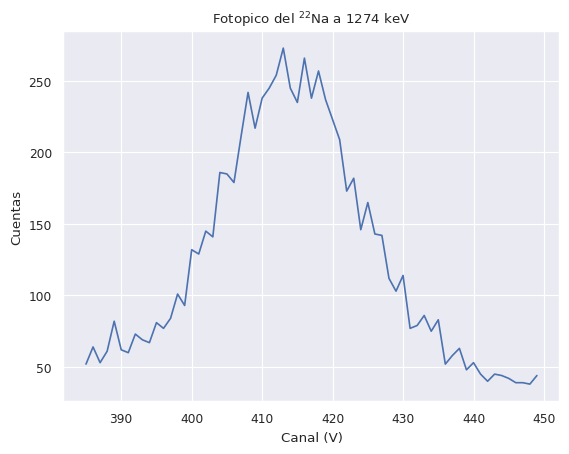

In [ ]:
g3=np.where(canal==385)[0][0]
g4=np.where(canal==450)[0][0]
cuentas_p2= cuentas[g3:g4]
canal_p2=  canal[g3:g4]
plt.plot(canal_p2,cuentas_p2)
plt.xlabel('Canal (V)')
plt.ylabel('Cuentas')
plt.title('Fotopico del $^{22}\mathrm{Na}$ a 1274 keV')
plt.show()

In [ ]:
M02=max(cuentas_p2)
posicion_mu2=np.where(cuentas_p2==M02)[0]
mu02=canal_p2[posicion_mu2]

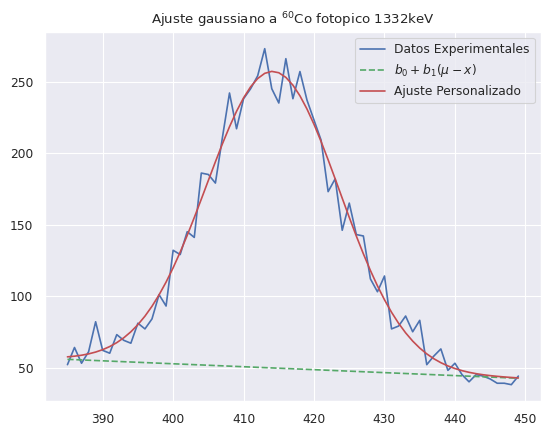


Resultados del ajuste gaussiano para el segundo fotopico:

Valor de b0 : 49.69(2.86)
Valor de b1 : 0.21(0.09)
Valor de μ : 414.18(0.2)
Amplitud M : 207.43(3.81)
Desviación Estándar σ : -9.44(0.25)
Intensidad (cuentas) : 8089
FWHM: -22.23


In [ ]:
# Define la función que deseas ajustar
def curva(x, b0, b1, mu, M, sigma):
    return b0 + b1 * (mu - x) + M * np.exp(-((mu - x)**2) / (2 * sigma**2))

parametros_iniciales = [1.0, 1.0, mu02[0], M02, 150.0]
limite_inf = 385
limite_sup = 450

parametros_optimos, pcov = curve_fit(curva, canal_p2, cuentas_p2, p0=parametros_iniciales,method='trf')

#parámetros ajustados
b0, b1, mu, M, sigma = parametros_optimos
intensidad, _ = quad(curva, limite_inf, limite_sup, args=(b0, b1, mu, M, sigma))
fwhm = 2.3548*sigma

incertidumbres=np.sqrt(np.diag(pcov))
plt.title('Ajuste gaussiano a $^{60}\mathrm{Co}$ fotopico 1332keV')
plt.plot(canal_p2, cuentas_p2, label="Datos Experimentales")
plt.plot(canal_p2, b0 + b1 * (mu - canal_p2), '--', color='g', label=r'$b_0 + b_1(\mu - x)$')
plt.plot(canal_p2, curva(canal_p2, b0, b1, mu, M, sigma), 'r', label="Ajuste Personalizado")
plt.legend()
plt.show()

print('')
print("Resultados del ajuste gaussiano para el segundo fotopico:")
print('')
print(f"Valor de b0 : {round(b0,2)}({round(incertidumbres[0],2)})")
print(f"Valor de b1 : {round(b1,2)}({round(incertidumbres[1],2)})")
print(f"Valor de μ : {round(mu,2)}({round(incertidumbres[2],2)})")
print(f"Amplitud M : {round(M,2)}({round(incertidumbres[3],2)})")
print(f"Desviación Estándar σ : {round(sigma,2)}({round(incertidumbres[4],2)})")
print(f"Intensidad (cuentas) : {round(intensidad)}")
print(f"FWHM: {round(fwhm,2)}")

In [ ]:
#Altura del pico de intensidad a 1274 keV con datos .dat:

altura2=M+b0
altura2

257.1172666004706

**Razón de alturas experimental**



In [ ]:
R_exp=1765.4563331559207/257.1172666004706
R_exp

6.866346848262151

##Ajuste en Calibración de energía

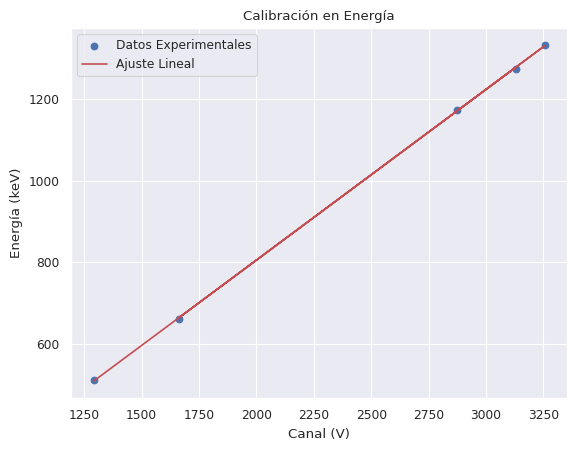

Resultados de la calibración en energía:

a0 (keV): -30.35215
a1 (keV/canal): 0.41797


In [ ]:
energias_referencia = np.array([1173, 1332, 661.657, 1274, 511])
canales_referencia = np.array([2871.83, 3254.88, 1661.85, 3130.43, 1290.92])

def calibracion_energia(canal, a0, a1):
    return a0 + a1 * canal

parametros_calibracion, _ = curve_fit(calibracion_energia, canales_referencia, energias_referencia, method='trf')
a0, a1 = parametros_calibracion

energias_calibradas = calibracion_energia(canales_referencia, a0, a1)

plt.scatter(canales_referencia, energias_referencia, label="Datos Experimentales")
plt.plot(canales_referencia, energias_calibradas, 'r', label="Ajuste Lineal")
plt.xlabel('Canal (V)')
plt.ylabel('Energía (keV)')
plt.title('Calibración en Energía')
plt.legend()
plt.show()

print("Resultados de la calibración en energía:")
print('')
print(f"a0 (keV): {a0:.5f}")
print(f"a1 (keV/canal): {a1:.5f}")

**Diferencia entre ajuste y experimental**

In [ ]:
canales_interes = np.array([1290.92, 1661.85, 2871.83, 3130.43, 3254.88])
energias_calculadas = calibracion_energia(canales_interes, a0, a1)

datos_experimentales = np.array([1173, 1332, 661.657, 1274, 511])
canales_experimentales = np.array([2871.83, 3254.88, 1661.85, 3130.43, 1290.92])


diferencias = datos_experimentales-calibracion_energia(canales_experimentales, a0, a1)
porcentajes_error = (diferencias/datos_experimentales) * 100

print("Energías correspondientes a los canales de interés:")
for i, canal in enumerate(canales_interes):
    print(f"Canal: {canal}, Energía Calculada: {energias_calculadas[i]:.2f} keV")

print("\nDiferencias entre datos experimentales y ajuste:")
for i, diferencia in enumerate(diferencias):
    print(f"Para Canal: {canales_experimentales[i]}, Diferencia: {diferencia:.2f} keV")

print("\nPorcentajes de error entre datos experimentales y ajuste:")
for i, porcentaje in enumerate(porcentajes_error):
    print(f"Para Canal: {canales_experimentales[i]}, Porcentaje de Error: {porcentaje:.2f}%")


Energías correspondientes a los canales de interés:
Canal: 1290.92, Energía Calculada: 509.22 keV
Canal: 1661.85, Energía Calculada: 664.26 keV
Canal: 2871.83, Energía Calculada: 1170.00 keV
Canal: 3130.43, Energía Calculada: 1278.08 keV
Canal: 3254.88, Energía Calculada: 1330.10 keV

Diferencias entre datos experimentales y ajuste:
Para Canal: 2871.83, Diferencia: 3.00 keV
Para Canal: 3254.88, Diferencia: 1.90 keV
Para Canal: 1661.85, Diferencia: -2.60 keV
Para Canal: 3130.43, Diferencia: -4.08 keV
Para Canal: 1290.92, Diferencia: 1.78 keV

Porcentajes de error entre datos experimentales y ajuste:
Para Canal: 2871.83, Porcentaje de Error: 0.26%
Para Canal: 3254.88, Porcentaje de Error: 0.14%
Para Canal: 1661.85, Porcentaje de Error: -0.39%
Para Canal: 3130.43, Porcentaje de Error: -0.32%
Para Canal: 1290.92, Porcentaje de Error: 0.35%


# 5. Solamente para el $^{137}Cs$

**a).** efecto foto eléctrico para el cs137 está relacionado con la interaccion de los fotones de rayos X con los electrones del material incidente. Por lo tanto el número de cuentas es **$N_{f} =144168$**.

**b).** Incertidumbre

In [ ]:
IncNf=round(np.sqrt(144168),2)
Nf=144168
print(IncNf)

379.69


**c) y d)** Número de cuentas en la región compton

In [ ]:
IncNc=round(np.sqrt(574358),2)
Nc=574358
print(f"Nc: {574358} \tIncertidumbre Nc: {IncNc}")

Nc: 574358 	Incertidumbre Nc: 757.86


***e).*** razón compton-fotopico

In [ ]:

r=Nc/Nf
print(f"r={round(Nc/Nf,2)}")

r=3.98


**f).** Incertidumbre r

In [ ]:
sigma= r*np.sqrt((IncNf/Nf)**2 + (IncNc/Nc)**2)
print(sigma)

0.011735580587985654


**g).**  Valores

In [ ]:
print(f"Nc= {Nc}({IncNc}) \nNf={Nf}({IncNf}) \nr={round(r,2)}({round(sigma,2)})")

Nc= 574358(757.86) 
Nf=144168(379.69) 
r=3.98(0.01)


#4. Borde compton y retrodipersión para $^{60}\mathrm{Co}$

In [ ]:
print(f"Canal para el pico de retrodispersión {0.41797*585-30.35215} keV")
print(f"Canal para el pico de borde compton {0.41797*2198-30.35215} keV")

Canal para el pico de retrodispersión 214.1603KeV
Canal para el pico de borde compton 888.34591KeV


**b).** Valor teórico y experimental de los picos de retrodisperción y efecto copmton.


Utilizando la ecuación $E_{c}= E_{1}\frac{2\varepsilon}{1+2\varepsilon}$, que describe el efecto Compton, y tomando $E_{1}= 1170$ KeV, un valor obtenido experimentalmente, se predice que el pico teórico del borde Compton correspondería a $960$ KeV. Sin embargo, en el experimento, se observó un pico a 888 KeV, lo que representa un error del $12\%$.

En cuanto al pico de retrodispersión, el valor experimental fue de $214$ KeV, mientras que el valor teórico, obtenido a través de la expresión $E_{R}=E_{2}=\frac{E_{1}}{1+2\varepsilon}$, es de $210$ KeV, lo que implica un error del $2\%$.

**c).** Hacer una gráfica que constrarte la posición del expetro teórico y experimental.

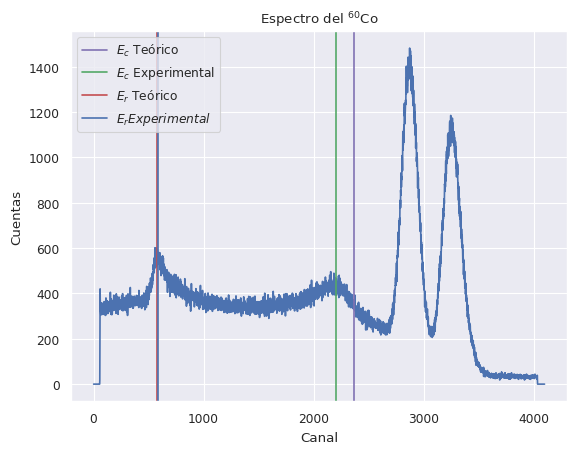

In [ ]:
new=np.array(new,dtype=int)
canal=new[0:len(new):2]
cuentas=new[1:len(new):2]

sns.set()
sns.set_context("paper")
plt.plot(canal,cuentas)

Ecteo=2369.434
Ecexp=2198.11
Erteo=575
Erexp=584.64

plt.axvline(Ecteo, color='m', linestyle='-', label=r'$E_{c}$ Teórico')
plt.axvline(Ecexp, color='g', linestyle='-', label=r'$E_{c}$ Experimental')
plt.axvline(Erteo, color='r', linestyle='-', label=r'$E_{r}$ Teórico')
plt.axvline(Erexp, color='b', linestyle='-', label=r'$E_{r} Experimental$')

plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Espectro del $^{60}\mathrm{Co}$')
plt.legend()

plt.savefig('comparacion valores.pdf')
plt.show()